Sandy Tsan, 861299012

Douglas Tran, 861208900
# Riverside Crime Reports Cleaning
### Part 1: Dataset info 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("project/Crime_Reports.csv")
df.head()

,_id,blockAddress,npc,premise,callTime,reportDate,rd,offenseDate,crimeType,caseNumber
0,160500,4700 BLOCK BEVERLY CT,NORTH,RESIDENTIAL,5:36AM,12/4/2018,E02,12/3/2018,MOTOR VEH. THEFT,P18228509
1,160499,9300 BLOCK INDIANA AVE,CENTRAL,RESIDENTIAL,3:45AM,12/4/2018,I16,12/4/2018,ROBBERY,P18228497
2,160498,3600 BLOCK NYE AVE,WEST,MISCELLANEOUS,3:38AM,12/4/2018,J12,12/4/2018,VANDALISM,P18228495
3,160497,GOLDEN AVE/ TURNINGBEN WAY,WEST,HIGHWAYS,3:30AM,12/4/2018,H04,12/4/2018,OTHER,P18228490
4,160496,2500 BLOCK 14TH ST,EAST,RESIDENTIAL,10:55PM,12/3/2018,D02,12/3/2018,ASSAULT,P18228421


**Taken from the Riverside City data**: https://riversideca.gov/transparency/data/dataset/show/27/Crime_Reports?fbclid=IwAR3Lq1fsYQYDC96bSmoczD8NH4Wnuc-b-DkBa0dl5GTtwdI2HHi3w_0313E

Each row represents a crime reported to Riverside Police Department. The City of Riverside is divided into four (4) Command Areas referred to as Neighborhood Policing Centers (NPC). They are the NORTH; EAST; WEST; and CENTRAL NPCs. Within NPCs are smaller areas called Police Reporting Districts (RD). There are 134 RDs in the City. Crime Statistics available on this site have been compiled and presented based on these areas.

Update Frequency: Daily at 06:00

**Column Descriptions**:
- **caseNumber**: This is the unique identifier for each record.
- **reportDate**: The date the crime was reported.  This date is in "yyyy-MM-dd" format.
- **offenseDate**: The date the crime was occurred.  This date is in "yyyy-MM-dd" format.
- **callTime**: The timethe crime was reported.  This date is in "hh:mm a" format.
- **crimeType**: The type of crime.
- **premise**: The type of premise where the crime occurred.
- **blockAddress**: The address of the incident, which is "masked" at the hundred block level to protect any victim information.
- **rd**: The reporting district, which are boundaries setup within the City for compiling crime statistics. There are 134 RDs in the City.
- **npc**: The Neighborhood Policing Center.  There are four policing centers: NORTH, EAST, WEST, and CENTRAL.

### Part 2: Dataset cleaning

In [2]:
reports_df = df[["offenseDate","crimeType","premise","blockAddress"]].copy()
reports_df

,offenseDate,crimeType,premise,blockAddress
0,12/3/2018,MOTOR VEH. THEFT,RESIDENTIAL,4700 BLOCK BEVERLY CT
1,12/4/2018,ROBBERY,RESIDENTIAL,9300 BLOCK INDIANA AVE
2,12/4/2018,VANDALISM,MISCELLANEOUS,3600 BLOCK NYE AVE
3,12/4/2018,OTHER,HIGHWAYS,GOLDEN AVE/ TURNINGBEN WAY
4,12/3/2018,ASSAULT,RESIDENTIAL,2500 BLOCK 14TH ST
...,...,...,...,...
157646,12/3/2018,BURGLARY,RESIDENTIAL,8100 BLOCK DIANA AVE
157647,11/27/2018,THEFT,MISCELLANEOUS,6400 BLOCK FREMONT
157648,12/3/2018,MOTOR VEH. THEFT,HIGHWAYS,2300 BLOCK 5TH
157649,12/4/2018,MOTOR VEH. THEFT,COMM - Other,800 BLOCK LA CADENA DR


Looking at the variables that this dataset provides, we first want to remove the ones that don't feel relevant to the results that we want to show. In our project, we want to see if there is a correlation between the crime activity around certain areas versus the demographic of the area itself. With that, we probably would want information of the crime itself, rather than the report. So we keep variables like **offenseDate**, **crimeType**, **premise**, **blockAddress**, and **npc**

In [3]:
reports_df['offenseDate'].replace('', np.nan, inplace=True)
reports_df = reports_df.dropna(subset=['offenseDate'])

For **offenseDate** and **blockAddress**, we want to see if there are any missing or invalid data for these rows. We see that there are x amount of missing values for **offenseDate**. Because it is a small number of data that is missing (117 out of 150,000+ reports, we can just drop these rows as this small amount only accounts for 0.074% of the overall dataset

### Part 3: Dataset EDA

Unique Values in crimeType:  ['MOTOR VEH. THEFT' 'ROBBERY' 'VANDALISM' 'OTHER' 'ASSAULT' 'THEFT'
 'BURGLARY' 'FRAUD' 'DRUGS/ALCOHOL VIOLATIONS' 'WEAPONS' 'SEX CRIMES'
 'DISTURBING THE PEACE' 'unk' 'HOMICIDE']


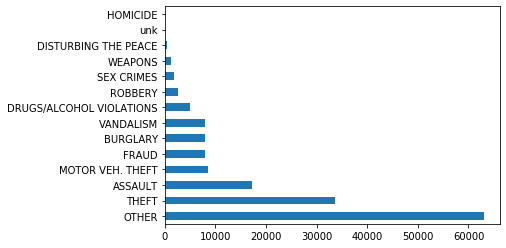

In [4]:
print("Unique Values in crimeType: ", reports_df.crimeType.unique())
crime_counts = reports_df.crimeType.value_counts()
crime_counts.plot.barh()

Unique Values in premise:  ['RESIDENTIAL' 'MISCELLANEOUS' 'HIGHWAYS' 'COMM - Other' 'COMM - Gas Stn'
 'COMM - Conv Store' 'COMM - Bank' 'unk']


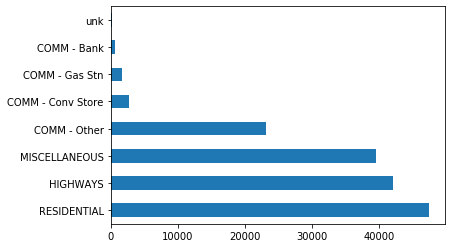

In [5]:
print("Unique Values in premise: ", reports_df.premise.unique())
premise_counts = reports_df.premise.value_counts()
premise_counts.plot.barh()

From this dataframe, we then also want to see what kinds of distribution of variables we are dealing with. For things such as **offenseDate** and **blockAddress**, it's easy to see that there is a finite  but too many variables to process individually. For things like **crimeType**, and **premise**, there is a smaller amount of variables to play around with, so we want to view these variables to see what we are working with.

We can see the common crime types (Other than other, theft and assault) as well as the common premises of crime (highways and residential) that happened in these areas.

There is not much we can do in terms of EDA except for plotting out frequencies and occurences for this dataset as it is mostly categorical. Plots such as scatter plots, pair-wise scatter plot, a parallel coordinates plot, and a box-plot cannot work well for categorical variables. 

# Yelp Restaurants in Riverside Dataset Cleaning
### Part 1: Dataset info 

Using Yelp's free API, I managed to gather up to 500 local restaurants in Riverside county, along with their price ranges, ratings, review counts, and addresses. Below is a dataframe.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import csv
import math
%matplotlib inline

df = pd.read_csv('project/Yelp/restaurants.csv')
df = df.replace(np.nan, 0.0, regex=True)
df

,name,price,rating,review_count,address,city,state,zip_code
0,Diablos Micheladas Mexican Grill,$$,4.0,19,8304 Limonite Ave,Riverside,CA,92509
1,Sushi R91,$$,4.0,417,1630 Spruce St,Riverside,CA,92507
2,Placita,$$,4.0,182,1805 University Ave,Riverside,CA,92507
3,Rockstar Shrimp,$$,4.0,434,767 W Blaine St,Riverside,CA,92507
4,Yard House,$$,3.5,876,3775 Tyler St,Riverside,CA,92503
...,...,...,...,...,...,...,...,...
495,Baker's Drive-Thru,$,3.0,84,2221 Main St,Riverside,CA,92501
496,McDonald's,$,1.5,123,7474 Indiana St,Riverside,CA,92504
497,Burger King,$,3.5,4,5200 van buren blvd,Riverside,CA,92503
498,Fast 5 Pizza,$,3.5,30,1889 University Ave,Riverside,CA,92507


### Part 2: Dataset cleaning and EDA

Organizing by price, we get the following. (NOTE: We'll use a simple bar chart to best visualize this data.)

$:  280
$$:  164
$$$:  2
N/A:  54


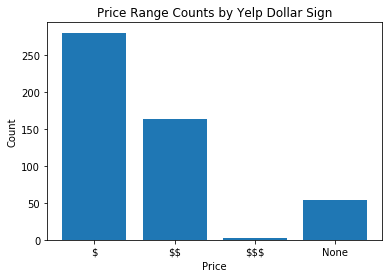

In [7]:
single = df.price[df.price == '$'].count()
double = df.price[df.price == '$$'].count()
triple = df.price[df.price == '$$$'].count()
# combine = single + double + triple
# none = 500 - combine
none = df.price[df.price == 0].count()

print("$: ", single)
print("$$: ", double)
print("$$$: ", triple)
print("N/A: ", none)

data = [single, double, triple, none]
plt.bar(["\$", "\$\$", "\$\$\$", "None"], data)
plt.title('Price Range Counts by Yelp Dollar Sign')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

We'll now observe the correlation between restaurant ratings and their review counts.

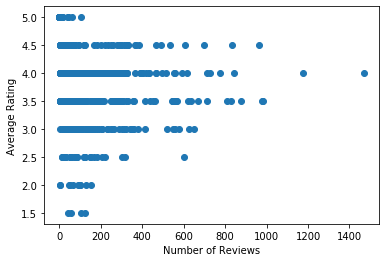

In [8]:
plt.scatter(x=df['review_count'], y=df['rating'])
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.show()

We can see that very few restaurants have over 600 reviews. Let's filter this down from 0 to 600 reviews for clarity.

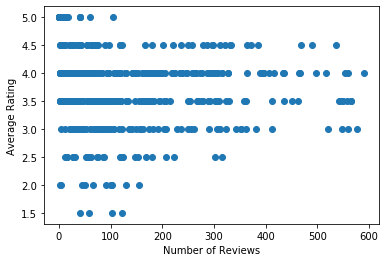

In [9]:
df2 = pd.read_csv('project/Yelp/restaurants.csv')
df2 = df2[df2['review_count'] < 600]

plt.scatter(x=df2['review_count'], y=df2['rating'])
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.show()

We can see that the majority of ratings are around 3 to 4 stars. This is an average measurement, nothing too special. A handful of reviews are below 3 stars as well. Now that we've made an inference based on the graph, we output the total number of review partitions below:

Reviews
1.0:  0
1.5:  4
2.0:  11
2.5:  27
3.0:  73
3.5:  137
4.0:  155
4.5:  61
5.0:  32


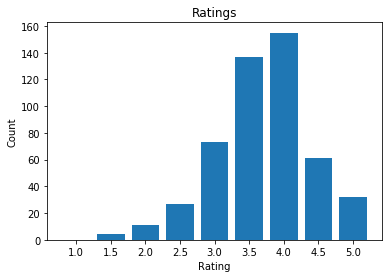

In [10]:
r1 = df.price[df.rating == 1.0].count()
r15 = df.price[df.rating == 1.5].count()
r2 = df.price[df.rating == 2.0].count()
r25 = df.price[df.rating == 2.5].count()
r3 = df.price[df.rating == 3.0].count()
r35 = df.price[df.rating == 3.5].count()
r4 = df.price[df.rating == 4.0].count()
r45 = df.price[df.rating == 4.5].count()
r5 = df.price[df.rating == 5.0].count()
print("Reviews")
print("1.0: ", r1)
print("1.5: ", r15)
print("2.0: ", r2)
print("2.5: ", r25)
print("3.0: ", r3)
print("3.5: ", r35)
print("4.0: ", r4)
print("4.5: ", r45)
print("5.0: ", r5)
data2 = [r1, r15, r2, r25, r3, r35, r4, r45, r5]
plt.bar(["1.0", "1.5", "2.0", "2.5", "3.0", "3.5", "4.0", "4.5", "5.0"], data2)
plt.title('Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Let's examine the review counts, but with single dollar sign (cheap) restaurants, since more people tend to go to cheaper restaurants.

In [11]:
df3 = pd.read_csv('project/Yelp/restaurants.csv')
df3 = df3[df3['price'] == '$']
df3

,name,price,rating,review_count,address,city,state,zip_code
12,Royal Orchid Thai Restaurant,$,4.0,327,9791 Magnolia Ave,Riverside,CA,92503
18,Taco Station,$,4.0,590,4088 Mission Inn Ave,Riverside,CA,92501
22,Taqueria 2 Potrillos - Riverside,$,4.0,97,10088 Magnolia Ave,Riverside,CA,92503
24,D'caesaro Pizza & Italian Restaurant,$,4.5,372,6160 Arlington Ave,Riverside,CA,92504
29,El Trigo,$,4.5,386,4155 Park Ave,Riverside,CA,92507
...,...,...,...,...,...,...,...,...
494,Church's Chicken,$,2.0,101,1886 University Ave,Riverside,CA,92507
495,Baker's Drive-Thru,$,3.0,84,2221 Main St,Riverside,CA,92501
496,McDonald's,$,1.5,123,7474 Indiana St,Riverside,CA,92504
497,Burger King,$,3.5,4,5200 van buren blvd,Riverside,CA,92503


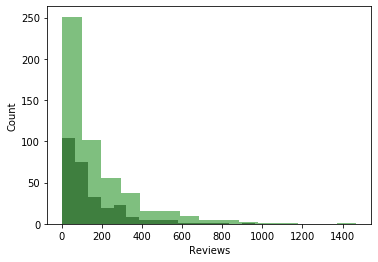

In [12]:
x = df3['review_count']
y = df['review_count']
num_bins = 15
n, bins, patches = plt.hist(x, num_bins, facecolor='black', alpha=0.5)
n, bins, patches = plt.hist(y, num_bins, facecolor='green', alpha=0.5)
plt.subplots_adjust(left=0.15)
plt.xlabel("Reviews")
plt.ylabel("Count")
plt.show()

Where the black represents the single dollar sign restaurants and the green represents the initial dataset. We can draw the conclusion for both sets being compared that most of these restaurants tend to average around 0 to 200 reviews each. This means that either Riverside restaurants are not as popular, there are few "Yelpers" to leave reviews for this area, or these businesses haven't been around for a while.